# MICROSOFT ENTERS THE MOVIE BUSINESS

### 1. Project Setup and Initial Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline

First, we need to look at the data we are working with before proceeding.

We will start with tmdb.movies.csv

In [2]:
tmdb_file_location = '../tmdb.movies.csv'

tmdb_movies_df = pd.read_csv(tmdb_file_location)
tmdb_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [3]:
tmdb_movies_df.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [4]:
tmdb_movies_df.shape

(26517, 10)

tmdb.movies.csv has the following 10 columns 'Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title', 'popularity', 'release_date', 'title', 'vote_average', 'vote_count''

It has 10 columns and 26,517 rows

Looks like this table summarizes the movies popularity with the fans.

Next, lets see what data is in tn.movie_budgets.

In [5]:
tn_movie_budget_path = '../tn.movie_budgets.csv'

movie_budgets_df = pd.read_csv(tn_movie_budget_path)

movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
movie_budgets_df.shape

(5782, 6)

In [7]:
movie_budgets_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

tn.movie_budgets.csv has the following 6 columns 'id', 'release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross'.

It has 5782 rows and 6 columns

Looks like this table sumarizes how successful movies are from a monetary perspective.

Next we will connect to the database and look at what is in it

From the ERD, the table 'movie_basics' looks like a good place to start

In [8]:


conn = sqlite3.connect('../im.db')

cur = conn.cursor()



In [9]:
cur.execute(""" SELECT name, type, sql FROM sqlite_master WHERE type = 'table';""")

tables = cur.fetchall()

print(tables)

[('movie_basics', 'table', 'CREATE TABLE "movie_basics" (\n"movie_id" TEXT,\n  "primary_title" TEXT,\n  "original_title" TEXT,\n  "start_year" INTEGER,\n  "runtime_minutes" REAL,\n  "genres" TEXT\n)'), ('directors', 'table', 'CREATE TABLE "directors" (\n"movie_id" TEXT,\n  "person_id" TEXT\n)'), ('known_for', 'table', 'CREATE TABLE "known_for" (\n"person_id" TEXT,\n  "movie_id" TEXT\n)'), ('movie_akas', 'table', 'CREATE TABLE "movie_akas" (\n"movie_id" TEXT,\n  "ordering" INTEGER,\n  "title" TEXT,\n  "region" TEXT,\n  "language" TEXT,\n  "types" TEXT,\n  "attributes" TEXT,\n  "is_original_title" REAL\n)'), ('movie_ratings', 'table', 'CREATE TABLE "movie_ratings" (\n"movie_id" TEXT,\n  "averagerating" REAL,\n  "numvotes" INTEGER\n)'), ('persons', 'table', 'CREATE TABLE "persons" (\n"person_id" TEXT,\n  "primary_name" TEXT,\n  "birth_year" REAL,\n  "death_year" REAL,\n  "primary_profession" TEXT\n)'), ('principals', 'table', 'CREATE TABLE "principals" (\n"movie_id" TEXT,\n  "ordering" IN

The imdb database has the following tables 'movie_basics', 'directors', 'known_for', 'movie_akas','movie_ratings', 'persons', 'principals', 'writers'

Next we will load this data into a dataframe for easier inspection and review.

In [10]:
for name, type, sql in tables:
    print(f"Table Name: {name}")
    print(f"SQL: {sql}")
    print()

Table Name: movie_basics
SQL: CREATE TABLE "movie_basics" (
"movie_id" TEXT,
  "primary_title" TEXT,
  "original_title" TEXT,
  "start_year" INTEGER,
  "runtime_minutes" REAL,
  "genres" TEXT
)

Table Name: directors
SQL: CREATE TABLE "directors" (
"movie_id" TEXT,
  "person_id" TEXT
)

Table Name: known_for
SQL: CREATE TABLE "known_for" (
"person_id" TEXT,
  "movie_id" TEXT
)

Table Name: movie_akas
SQL: CREATE TABLE "movie_akas" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "title" TEXT,
  "region" TEXT,
  "language" TEXT,
  "types" TEXT,
  "attributes" TEXT,
  "is_original_title" REAL
)

Table Name: movie_ratings
SQL: CREATE TABLE "movie_ratings" (
"movie_id" TEXT,
  "averagerating" REAL,
  "numvotes" INTEGER
)

Table Name: persons
SQL: CREATE TABLE "persons" (
"person_id" TEXT,
  "primary_name" TEXT,
  "birth_year" REAL,
  "death_year" REAL,
  "primary_profession" TEXT
)

Table Name: principals
SQL: CREATE TABLE "principals" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "person_id" TEXT,

From the column tables and looking at the excel sheets, we will narrow the database tables we work with to the following tables: <br/>
'movie_basics', 'movie_ratings', 'directors', 'principals','persons'.<br/>
Let us load these tables into DataFrames

In [11]:
movie_basics_df = pd.read_sql("SELECT * FROM movie_basics", conn)
movie_ratings_df = pd.read_sql("SELECT * FROM movie_ratings", conn)
persons_df = pd.read_sql("SELECT * FROM persons", conn)
directors_df = pd.read_sql("SELECT * FROM directors", conn)
principals_df = pd.read_sql("SELECT * FROM principals", conn)

Based on the datasets and the business problem, I think the columns below will be useful in understanding which films are likely to perform well, why they are likely to be successful, what the budget for a successful film would be, and how much profit we can expect from such films. 

The columns below will be useful in solving our business problem

Key Columns for Analysis:

Genres: From tmdb.movies.csv and movie_basics. <br/>
Release Date/Year: From tmdb.movies.csv and movie_basics. <br/>
Ratings: From tmdb.movies.csv (vote_average and vote_count) and movie_ratings (averagerating and numvotes). <br/>
Budget and Revenue: From tn.movie_budgets.csv (production_budget, domestic_gross, worldwide_gross). <br/>
Popularity: From tmdb.movies.csv (popularity). <br/>
Language: From tmdb.movies.csv (original_language). <br/>
Runtime: From movie_basics (runtime_minutes). <br/>
Director and Principal Roles: From persons,directors and principals. <br/>

#### Step 1: Data Cleaning and Integration

##### a. Inspect and clean the data

In [12]:
# Inspect tmdb_movies_df

print(tmdb_movies_df.info())
tmdb_movies_df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB
None


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


tmdb_movies_df does not seem to have any missing values but it has an index column and the release_date is in string format.
Let us convert release_date to datetime and drop the rows with missing values. We also don't need the unnamed column

In [13]:
#convert release_date to datetime
tmdb_movies_df['release_date'] = pd.to_datetime(tmdb_movies_df['release_date'])

#let's drop 'unnamed: 0', 'id', and 'genre_ids' as they do not seem useful in their current formats
tmdb_movies_df.drop(columns = ['Unnamed: 0', 'id','genre_ids'], inplace = True)

print(tmdb_movies_df.info())
tmdb_movies_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   original_language  26517 non-null  object        
 1   original_title     26517 non-null  object        
 2   popularity         26517 non-null  float64       
 3   release_date       26517 non-null  datetime64[ns]
 4   title              26517 non-null  object        
 5   vote_average       26517 non-null  float64       
 6   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 1.4+ MB
None


,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [14]:
# Inspect movie_budgets_df
print(movie_budgets_df.info())
movie_budgets_df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


movie_budgets_df does not have any missing values either but release date is in string format and production_budget, domestic_gross, worldwide_gross have '$' characters that we should remove to convert the data into integers or floats. It also has an index column that we should keep in mind.

In [15]:
#remove dollar sign from columns and convert to intergers
columns_to_clean = ['production_budget','domestic_gross','worldwide_gross']

for column in columns_to_clean:
    movie_budgets_df[column] = movie_budgets_df[column].replace('[\$,]','', regex = True).astype(np.int64)

#we do not need the column 'id'
movie_budgets_df.drop(columns = ['id', 'release_date'], inplace  = True)

print(movie_budgets_df.info())
movie_budgets_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movie              5782 non-null   object
 1   production_budget  5782 non-null   int64 
 2   domestic_gross     5782 non-null   int64 
 3   worldwide_gross    5782 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 180.8+ KB
None


,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,425000000,760507625,2776345279
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,Dark Phoenix,350000000,42762350,149762350
3,Avengers: Age of Ultron,330600000,459005868,1403013963
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


Let us merge movie_budgets_df and tmdb movies using the movie name to see the box office performance of each movie in addition to ratings and other movie details

In [16]:
#first we will need to rename title to movie in tmdb_movies for us to have a common column

tmdb_movies_df.rename(columns = {'title':'movie'}, inplace = True)

tmdb_movies_performance_df = pd.merge(movie_budgets_df, tmdb_movies_df, on = 'movie', how = 'inner')

print(tmdb_movies_performance_df.info())
tmdb_movies_performance_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2385 entries, 0 to 2384
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie              2385 non-null   object        
 1   production_budget  2385 non-null   int64         
 2   domestic_gross     2385 non-null   int64         
 3   worldwide_gross    2385 non-null   int64         
 4   original_language  2385 non-null   object        
 5   original_title     2385 non-null   object        
 6   popularity         2385 non-null   float64       
 7   release_date       2385 non-null   datetime64[ns]
 8   vote_average       2385 non-null   float64       
 9   vote_count         2385 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 205.0+ KB
None


,movie,production_budget,domestic_gross,worldwide_gross,original_language,original_title,popularity,release_date,vote_average,vote_count
0,Avatar,425000000,760507625,2776345279,en,Avatar,26.526,2009-12-18,7.4,18676
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571
2,Avengers: Age of Ultron,330600000,459005868,1403013963,en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457
3,Avengers: Infinity War,300000000,678815482,2048134200,en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948
4,Justice League,300000000,229024295,655945209,en,Justice League,34.953,2017-11-17,6.2,7510


In [17]:
 #Inspect movie_basics_df
print(movie_basics_df.info())
movie_basics_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


movie_basics_df has some missing values for original_title, runtime_minutes and genres. movie_id seems to be the column containing unique identifiers (primary key)

In [18]:
# Inspect movie_ratings_df
print(movie_ratings_df.info())
movie_ratings_df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


movie_ratings seems ok with no missing value. movie_id seems to be a unique identifier

In [19]:
# Inspect directors_df
print(directors_df.info())
directors_df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB
None


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [20]:
# Inspect persons_df
print(persons_df.info())
persons_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB
None


,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


directors_df seems ok with no missing value.movie_id seems to be a unique identifier

In [21]:
# Inspect principals_df
print(principals_df.info())
principals_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   person_id   1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB
None


,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


We have several missing rows for the job and characters columns. again movie_id seems to be a unique identifier

Let us merge the movie_basics_df and movie_ratings_df using movie_id.

In [22]:
#start by merging movie_basics_df and movie_ratings_df
movie_basics_and_ratings_df = pd.merge(movie_basics_df, movie_ratings_df, on = 'movie_id', how = 'inner')

print(movie_basics_and_ratings_df.info())
movie_basics_and_ratings_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB
None


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


We can fill the missing values in the column run_time with the median run_time. Can we drop 

In [23]:
median_runtime = movie_basics_and_ratings_df['runtime_minutes'].median()

movie_basics_and_ratings_df['runtime_minutes'] = movie_basics_and_ratings_df['runtime_minutes'].fillna(median_runtime)

movie_basics_and_ratings_df.dropna(inplace = True)

print(movie_basics_and_ratings_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73052 non-null  object 
 1   primary_title    73052 non-null  object 
 2   original_title   73052 non-null  object 
 3   start_year       73052 non-null  int64  
 4   runtime_minutes  73052 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73052 non-null  float64
 7   numvotes         73052 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.0+ MB
None


Next, let's merge the DataFrames with person_id as unique identifiers

In [24]:
#merges all directors and principals records
directors_and_principals_df = pd.merge(directors_df, principals_df, on = 'person_id', how = 'outer')

#merges all directors, principals and their personal details
directors_and_principals_df = pd.merge(directors_and_principals_df, persons_df, on = 'person_id', how = 'inner')

#drops duplicated movie_id column and renames movie_id_x to movie_id
directors_and_principals_df.drop(columns = 'movie_id_y', inplace = True)
directors_and_principals_df.rename(columns = {'movie_id_x': 'movie_id'}, inplace = True)

print(directors_and_principals_df.info())
directors_and_principals_df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1829524 entries, 0 to 1829523
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   movie_id            object 
 1   person_id           object 
 2   ordering            float64
 3   category            object 
 4   job                 object 
 5   characters          object 
 6   primary_name        object 
 7   birth_year          float64
 8   death_year          float64
 9   primary_profession  object 
dtypes: float64(3), object(7)
memory usage: 153.5+ MB
None


,movie_id,person_id,ordering,category,job,characters,primary_name,birth_year,death_year,primary_profession
0,tt0285252,nm0899854,5.0,director,None,None,Tony Vitale,1964.0,NaN,"producer,director,writer"
1,tt0462036,nm1940585,5.0,director,None,None,Bill Haley,NaN,NaN,"director,writer,producer"
2,tt0835418,nm0151540,1.0,actor,None,"[""Thorny""]",Jay Chandrasekhar,1968.0,NaN,"director,actor,writer"
3,tt0835418,nm0151540,4.0,self,None,"[""Himself - Director of 'Super Troopers' - 'Th...",Jay Chandrasekhar,1968.0,NaN,"director,actor,writer"
4,tt0835418,nm0151540,5.0,director,None,None,Jay Chandrasekhar,1968.0,NaN,"director,actor,writer"


Let's see this persons' ratings by merging the movie_ratings

In [25]:
directors_and_principals_ratings_df =  pd.merge(directors_and_principals_df, movie_ratings_df, on = 'movie_id', how = 'inner')

movie_basics_personnel_ratings_df = pd.merge(movie_basics_and_ratings_df, directors_and_principals_ratings_df, on = 'movie_id', how = 'inner')



In [26]:
columns_to_drop_2 = ['job', 'averagerating_y','numvotes_y']
movie_basics_personnel_ratings_df.drop(columns = columns_to_drop_2, inplace = True)

movie_basics_personnel_ratings_df.rename(columns = {'averagerating_x': 'averagerating', 'numvotes_x': 'numvotes'}, inplace = True)

print(movie_basics_personnel_ratings_df.info())
movie_basics_personnel_ratings_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711125 entries, 0 to 711124
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   movie_id            711125 non-null  object 
 1   primary_title       711125 non-null  object 
 2   original_title      711125 non-null  object 
 3   start_year          711125 non-null  int64  
 4   runtime_minutes     711125 non-null  float64
 5   genres              711125 non-null  object 
 6   averagerating       711125 non-null  float64
 7   numvotes            711125 non-null  int64  
 8   person_id           711125 non-null  object 
 9   ordering            700004 non-null  float64
 10  category            700004 non-null  object 
 11  characters          112297 non-null  object 
 12  primary_name        711125 non-null  object 
 13  birth_year          319299 non-null  float64
 14  death_year          5206 non-null    float64
 15  primary_profession  710990 non-nul

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,ordering,category,characters,primary_name,birth_year,death_year,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,5.0,director,None,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,5.0,director,None,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,5.0,director,None,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,5.0,director,None,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,nm0002411,5.0,director,None,Mani Kaul,1944.0,2011.0,"director,writer,actor"


In [27]:
columns_to_drop_3 = ['movie_id','category','ordering', 'characters','person_id']

movie_basics_personnel_ratings_df.drop(columns = columns_to_drop_3, inplace = True )

Let us see if there are duplicated rows

In [28]:
movie_basics_personnel_ratings_df.duplicated().sum()

625898

In [29]:
movie_basics_personnel_ratings_df.drop_duplicates(inplace = True)

In [30]:
movie_basics_personnel_ratings_df.duplicated().sum()

0

In [31]:
movie_basics_personnel_ratings_df['birth_year'].fillna(0, inplace=True)
movie_basics_personnel_ratings_df['death_year'].fillna(0, inplace=True)

In [32]:
#Let's create the 'status' column to replace 'birth_year' and 'death_year' to see whether important personnel is alive or not
def determine_status(row):
    if row['death_year'] > 0:
        return 'dead'
    elif row['birth_year'] > 0 and row['death_year'] == 0:
        return 'alive'
    else:
        return 'unknown'

movie_basics_personnel_ratings_df['status'] = movie_basics_personnel_ratings_df.apply(determine_status, axis=1)


movie_basics_personnel_ratings_df.drop(columns=['birth_year', 'death_year'], inplace=True)


In [33]:
movie_basics_personnel_ratings_df.dropna(subset = ['primary_profession'], inplace = True)

In [34]:
print(movie_basics_personnel_ratings_df.info())
movie_basics_personnel_ratings_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85138 entries, 0 to 711123
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   primary_title       85138 non-null  object 
 1   original_title      85138 non-null  object 
 2   start_year          85138 non-null  int64  
 3   runtime_minutes     85138 non-null  float64
 4   genres              85138 non-null  object 
 5   averagerating       85138 non-null  float64
 6   numvotes            85138 non-null  int64  
 7   primary_name        85138 non-null  object 
 8   primary_profession  85138 non-null  object 
 9   status              85138 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 7.1+ MB
None


,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,primary_name,primary_profession,status
0,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Harnam Singh Rawail,"director,writer,producer",dead
4,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,Mani Kaul,"director,writer,actor",dead
5,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,Orson Welles,"actor,director,writer",dead
15,Sabse Bada Sukh,Sabse Bada Sukh,2018,91.0,"Comedy,Drama",6.1,13,Hrishikesh Mukherjee,"director,editor,writer",dead
16,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,Valeria Sarmiento,"editor,director,writer",alive


In [35]:
print(tmdb_movies_performance_df.info())
tmdb_movies_performance_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2385 entries, 0 to 2384
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie              2385 non-null   object        
 1   production_budget  2385 non-null   int64         
 2   domestic_gross     2385 non-null   int64         
 3   worldwide_gross    2385 non-null   int64         
 4   original_language  2385 non-null   object        
 5   original_title     2385 non-null   object        
 6   popularity         2385 non-null   float64       
 7   release_date       2385 non-null   datetime64[ns]
 8   vote_average       2385 non-null   float64       
 9   vote_count         2385 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 205.0+ KB
None


,movie,production_budget,domestic_gross,worldwide_gross,original_language,original_title,popularity,release_date,vote_average,vote_count
0,Avatar,425000000,760507625,2776345279,en,Avatar,26.526,2009-12-18,7.4,18676
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571
2,Avengers: Age of Ultron,330600000,459005868,1403013963,en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457
3,Avengers: Infinity War,300000000,678815482,2048134200,en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948
4,Justice League,300000000,229024295,655945209,en,Justice League,34.953,2017-11-17,6.2,7510


In [36]:
tmdb_movies_performance_df.duplicated().sum()

174

In [37]:
tmdb_movies_performance_df.drop_duplicates(inplace = True)


In [38]:
tmdb_movies_performance_df.duplicated().sum()

0

Now we should be working with two clean main dataframes - movie_basics_personnel_ratings_df and tmdb_movies_performance_df, let us see if we can find additional relationships between the data in these dataframes

#### Step 2: Let us do some analysis on our dataframes

In [39]:
# Summary statistics for tmdb_movies_performance_df
print("Summary statistics for tmdb_movies_performance_df:")
print(tmdb_movies_performance_df.describe()/1000000)

# Distribution of categorical columns in tmdb_movies_performance_df
print("Distribution of original_language in tmdb_movies_performance_df:")
print(tmdb_movies_performance_df['original_language'].value_counts().head(10))

print("Distribution of release_year in tmdb_movies_performance_df:")
tmdb_movies_performance_df['release_year'] = tmdb_movies_performance_df['release_date'].dt.year
print(tmdb_movies_performance_df['release_year'].value_counts().head(10))


Summary statistics for tmdb_movies_performance_df:
       production_budget  domestic_gross  worldwide_gross    popularity  \
count           0.002211        0.002211         0.002211  2.211000e-03   
mean           37.432250       48.811377       118.194227  1.022043e-05   
std            51.066383       82.292046       221.459257  8.277149e-06   
min             0.009000        0.000000         0.000000  6.000000e-07   
25%             5.000000        0.669688         2.750329  4.185500e-06   
50%            18.000000       20.157300        36.374700  9.095000e-06   
75%            45.000000       57.128662       118.893989  1.393550e-05   
max           425.000000      760.507625      2776.345279  8.077300e-05   

       vote_average  vote_count  
count      0.002211    0.002211  
mean       0.000006    0.001583  
std        0.000001    0.002628  
min        0.000000    0.000001  
25%        0.000006    0.000040  
50%        0.000006    0.000509  
75%        0.000007    0.001910  
m

Let's visualize this summarized statistics

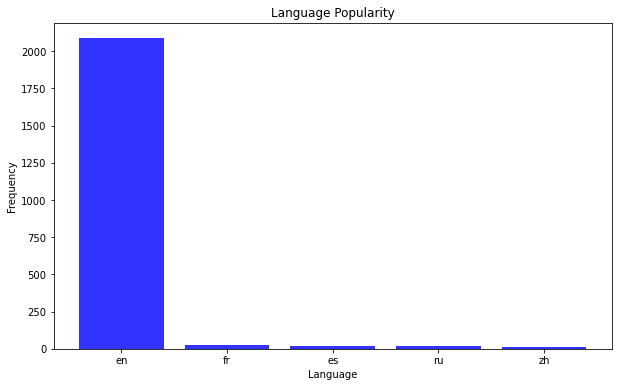

In [40]:
#bar plots showing movie distribution movie distribution by language
language = tmdb_movies_performance_df['original_language'].value_counts().head(5)


plt.figure(figsize=(10,6))
plt.bar(language.index, language.values, color = 'blue', alpha = 0.8)
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.title('Language Popularity')
plt.show()



Looks like English is the most popular language for movies to be made in

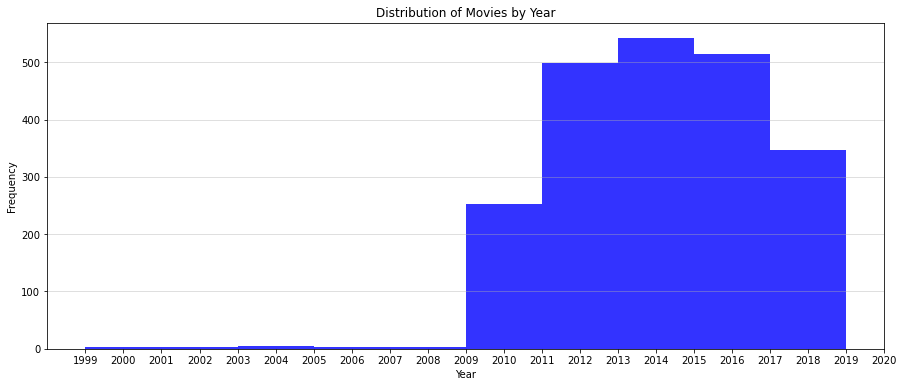

In [41]:
#histogram showing movie distribution by year 
release_year = tmdb_movies_performance_df[tmdb_movies_performance_df['release_year'] > 1998]['release_year']


plt.figure(figsize=(15,6))
plt.hist(release_year, bins = 10, color = 'blue', alpha = 0.8)
min_year = release_year.min()
max_year = release_year.max()
plt.xticks(np.arange(min_year, max_year + 2, step=1))

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Movies by Year')
plt.grid(axis='y', alpha=0.5)
plt.show()


Looks like movie making picked up after 2009 and peaked in 2016. We can check why movie production in subsequent years.

Next let's review production budgets.

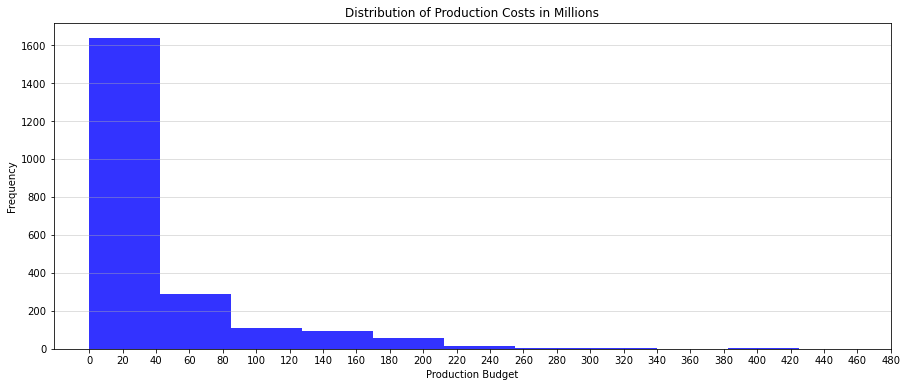

In [42]:
#histogram showing a distribution of production budgets
production_budget = tmdb_movies_performance_df[tmdb_movies_performance_df['production_budget'] > 0]['production_budget']/1000000


plt.figure(figsize=(15,6))
plt.hist(production_budget, bins = 10, color = 'blue', alpha = 0.8)
plt.xticks(np.arange(0, 500, step=20))

plt.xlabel('Production Budget')
plt.ylabel('Frequency')
plt.title('Distribution of Production Costs in Millions')
plt.grid(axis='y', alpha=0.5)
plt.show()


This histogram, combined with the summary statistics, confirms that most movies cost about 19 million to make with movies costing 45 million being on the 75th percentile. Let's see how this changes for movies with higher ratings i.e., above average

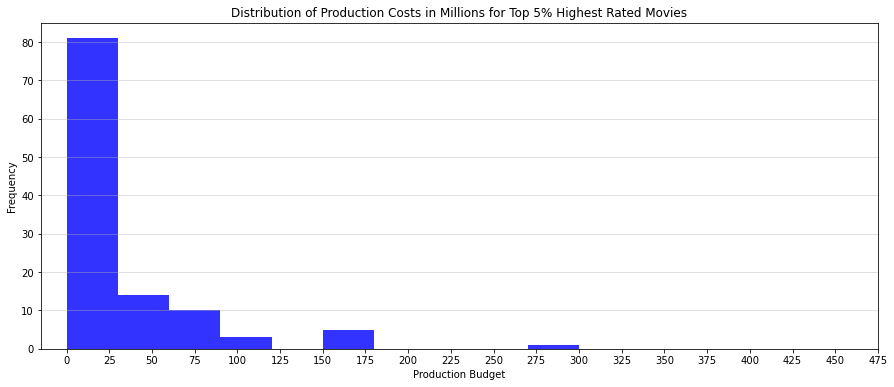

114
2211


In [58]:
#histogram showing a distribution of production budgets
highest_rated = tmdb_movies_performance_df['vote_average'].quantile(0.95)

production_budget_above_average = tmdb_movies_performance_df[tmdb_movies_performance_df['vote_average'] >=
highest_rated ]['production_budget'] / 1000000

plt.figure(figsize=(15,6))
plt.hist(production_budget_above_average, bins = 10, color = 'blue', alpha = 0.8)
plt.xticks(np.arange(0, 500, step=25))

plt.xlabel('Production Budget')
plt.ylabel('Frequency')
plt.title('Distribution of Production Costs in Millions for Top 5% Highest Rated Movies')
plt.grid(axis='y', alpha=0.5)
plt.show()

print(production_budget_above_average.count())
print(production_budget.count())


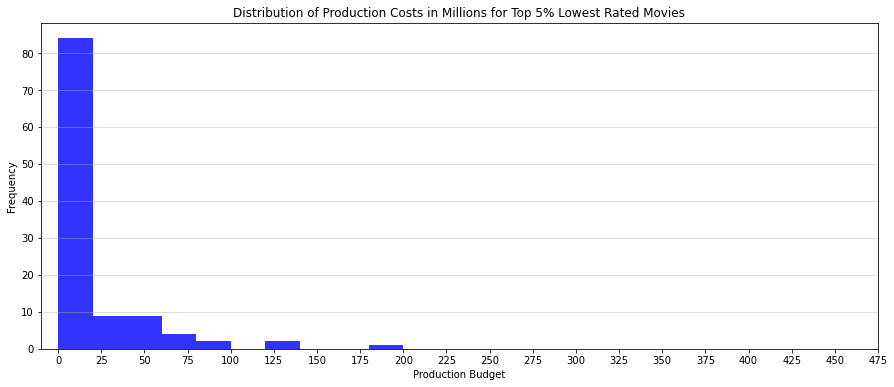

111
2211


In [50]:
#histogram showing a distribution of production budgets
lowest_rated = tmdb_movies_performance_df['vote_average'].quantile(0.05)

production_budget_above_average = tmdb_movies_performance_df[tmdb_movies_performance_df['vote_average'] <=
lowest_rated ]['production_budget'] / 1000000

plt.figure(figsize=(15,6))
plt.hist(production_budget_above_average, bins = 10, color = 'blue', alpha = 0.8)
plt.xticks(np.arange(0, 500, step=25))

plt.xlabel('Production Budget')
plt.ylabel('Frequency')
plt.title('Distribution of Production Costs in Millions for Top 5% Lowest Rated Movies')
plt.grid(axis='y', alpha=0.5)
plt.show()

print(production_budget_above_average.count())
print(production_budget.count())


In [45]:
tmdb_movies_performance_df.corr()

,production_budget,domestic_gross,worldwide_gross,popularity,vote_average,vote_count,release_year
production_budget,1.000000,0.720301,0.794036,0.548022,0.125232,0.607790,0.029673
domestic_gross,0.720301,1.000000,0.945599,0.530075,0.194530,0.700755,-0.010415
worldwide_gross,0.794036,0.945599,1.000000,0.555343,0.183899,0.717538,0.013855
popularity,0.548022,0.530075,0.555343,1.000000,0.286706,0.731124,0.065156
vote_average,0.125232,0.194530,0.183899,0.286706,1.000000,0.316742,-0.052756
vote_count,0.607790,0.700755,0.717538,0.731124,0.316742,1.000000,0.009042
release_year,0.029673,-0.010415,0.013855,0.065156,-0.052756,0.009042,1.000000


Comparing the distribution of the budget for the top 5 and lowest 5 rated movies, a higher production budget does not necessarily result into a higher rated movie and vice versa i.e. budget does not seem to be an important factor for a movies ratings. 

Correlation analysis confirms that there is a positive weak correlation between production budget and vote average.
The correlation analysis between popularity and vote average is also positive but weak, this signals that popular movies that are rated do not necessarily receive have higher ratings.

Also, popular movies tend to receive more ratings and vice versa from the strong positive correlation.

Should Microsoft make popular movies or higher rated movies?
Next we will compare the profits i.e. worldwide_gross - production budget  to the production budget, vote_average and popularity.

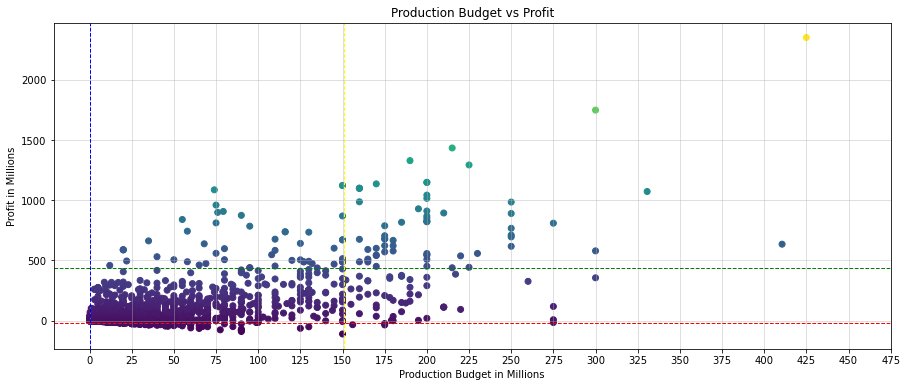

2211
2211
most profitable 439.382419
least profitable -17.93498
highest production budget 151.0
lowest production budget 0.5


In [67]:
#scatterplot showing a distribution of movie profit and production budgets
profit = (tmdb_movies_performance_df['worldwide_gross']-tmdb_movies_performance_df['production_budget'])/1000000
most_profitable = profit.quantile(0.95)
least_profitable = profit.quantile(0.05)

production_budget = tmdb_movies_performance_df['production_budget']/1000000
highest_production_budget = production_budget.quantile(0.95)
lowest_production_budget = production_budget.quantile(0.05)


plt.figure(figsize=(15,6))
plt.scatter(production_budget, profit, c = profit, cmap = 'viridis')
plt.axhline(most_profitable, color='green', linestyle='dashed', 
    linewidth=1, label=f'95th Percentile Profit ({most_profitable:.2f} million)')
plt.axhline(least_profitable, color='red', linestyle='dashed', linewidth=1, 
    label=f'5th Percentile Profit ({least_profitable:.2f} million)')
plt.axvline(highest_production_budget, color='yellow', linestyle='dashed', 
    linewidth=1, label=f'95th Percentile Production Budget ({highest_production_budget:.2f} million)')
plt.axvline(lowest_production_budget, color='blue', linestyle='dashed', 
    linewidth=1, label=f'5th Percentile Production Budget ({lowest_production_budget:.2f} million)')

plt.xticks(np.arange(0, 500, step=25))

plt.xlabel('Production Budget in Millions')
plt.ylabel('Profit in Millions')
plt.title('Production Budget vs Profit')
plt.grid(axis='both', alpha=0.5)
plt.show()

print(profit.count())
print(production_budget.count())
print('most profitable', most_profitable)
print('least profitable', least_profitable)
print('highest production budget', highest_production_budget)
print('lowest production budget', lowest_production_budget)


So from our scatter plot, the top 5% of most profitable movies have a production budget of about 151 million and the top 5% of movies make a profit of at least 439 million.

The most profitable movie on our dataset also had the highest production budget

While there are fewer movies making profits of more than 439 million relative to the whole dataset, a high production budget is good but not necessary to make a profit based on the top left quadrant of our scatter plot.

Next, let's see how popularity compares with profits.

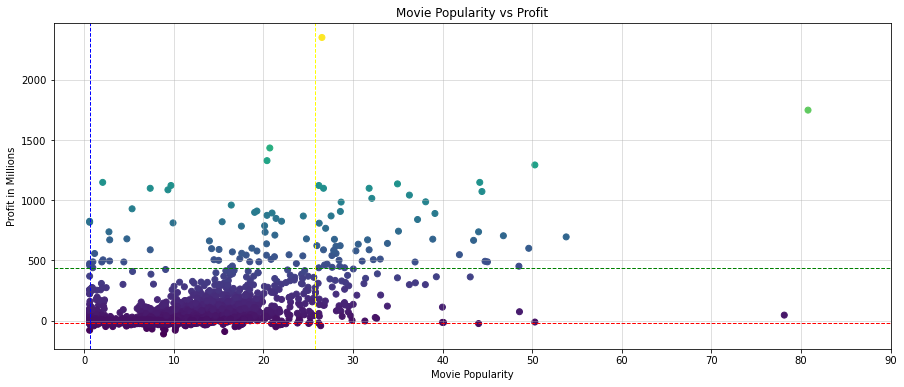

2211
2211
most profitable 439.382419
least profitable -17.93498
Most Popular 25.794
Leat Popular 0.6


In [68]:
#scatterplot showing a distribution of movie profit and production budgets
profit = (tmdb_movies_performance_df['worldwide_gross']-tmdb_movies_performance_df['production_budget'])/1000000
most_profitable = profit.quantile(0.95)
least_profitable = profit.quantile(0.05)

popularity = tmdb_movies_performance_df['popularity']
most_popular = popularity.quantile(0.95)
least_popular = popularity.quantile(0.05)


plt.figure(figsize=(15,6))
plt.scatter(popularity, profit, c = profit, cmap = 'viridis')
plt.axhline(most_profitable, color='green', linestyle='dashed', 
    linewidth=1, label=f'95th Percentile Profit ({most_profitable:.2f} million)')
plt.axhline(least_profitable, color='red', linestyle='dashed', 
    linewidth=1, label=f'5th Percentile Profit ({least_profitable:.2f} million)')
plt.axvline(most_popular, color='yellow', linestyle='dashed', 
    linewidth=1, label=f'95th Percentile Popularity ({most_popular:.2f} million)')
plt.axvline(least_popular, color='blue', linestyle='dashed', 
    linewidth=1, label=f'5th Percentile Popularity ({least_popular:.2f} million)')

plt.xticks(np.arange(0, 100, step=10))

plt.xlabel('Movie Popularity')
plt.ylabel('Profit in Millions')
plt.title('Movie Popularity vs Profit')
plt.grid(axis='both', alpha=0.5)
plt.show()

print(profit.count())
print(production_budget.count())
print('most profitable', most_profitable)
print('least profitable', least_profitable)
print('Most Popular', most_popular)
print('Leat Popular', least_popular)


From this scatter plot, the more popular a movie is, the more likely it's going to be profitable. However, movies that are not popular can also be profitable - infact, the most profitable movie was not the most popular.

Let's repeat this with ratings instead of popularity.

In [69]:
#scatterplot showing a distribution of movie profit and production budgets
profit = (tmdb_movies_performance_df['worldwide_gross']-tmdb_movies_performance_df['production_budget'])/1000000
most_profitable = profit.quantile(0.95)
least_profitable = profit.quantile(0.05)

rating = tmdb_movies_performance_df['vote_average']

plt.figure(figsize=(15,6))
plt.scatter(rating, profit, c = profit, cmap = 'viridis')
plt.axhline(most_profitable, color='green', linestyle='dashed', 
    linewidth=1, label=f'95th Percentile Profit ($most_profitable:.2f} million)')
plt.axhline(least_profitable, color='red', linestyle='dashed', 
    linewidth=1, label=f'5th Percentile Profit ({least_profitable:.2f} million)')
plt.axvline(highest_rated, color='yellow', linestyle='dashed', 
    linewidth=1, label=f'95th Percentile Rating ({highly_rated:.2f} million)')
plt.axvline(lowest_rated, color='blue', linestyle='dashed', 
    linewidth=1, label=f'5th Percentile Rating ({lowest_rated:.2f} million)')

plt.xticks(np.arange(0, 10, step=1))

plt.xlabel('Movie Rating')
plt.ylabel('Profit in Millions')
plt.title('Movie Rating vs Profit')
plt.grid(axis='both', alpha=0.5)
plt.show()

print(profit.count())
print(production_budget.count())
print('most profitable', most_profitable)
print('least profitable', least_profitable)
print('Highly Rated', highest_rated)
print('Lowly Rated', lowest_rated)


SyntaxError: f-string: single '}' is not allowed (<ipython-input-69-a93c5d5cf5c0>, line 11)

So a the top right quadrant is where we would like any movies we maket to be i.e. a rating above 7.9 and profits of more than 439 million dollars. A low rating almost guarantees a movie will not be as profitable as the higher rated movies.

Lastly, let us look at the popularity vs the rating for the most profitable moves and the least profitable movies

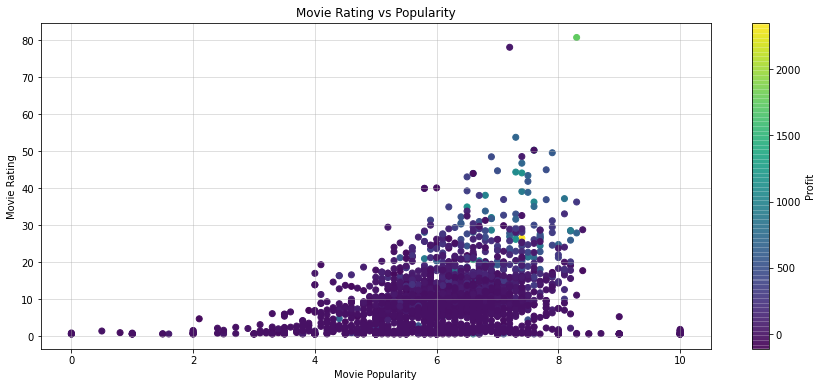

2211
2211
most popular 25.794
least popular 0.6
Highly Rated 7.9
Lowly Rated 4.15


In [76]:
#scatterplot showing a distribution of movie profit and production budgets

plt.figure(figsize=(15,6))
plt.scatter(rating, popularity, c = profit, cmap = 'viridis')

cbar = plt.colorbar(sc)
cbar.set_label('Profit')



plt.xlabel('Movie Popularity')
plt.ylabel('Movie Rating')
plt.title('Movie Rating vs Popularity')
plt.grid(axis='both', alpha=0.5)
plt.show()

print(profit.count())
print(production_budget.count())
print('most popular', most_popular)
print('least popular', least_popular)
print('Highly Rated', highest_rated)
print('Lowly Rated', lowest_rated)


In [ ]:
# Summary statistics for movie_basics_personnel_ratings_df
print("\nSummary statistics for movie_basics_personnel_ratings_df:")
print(movie_basics_personnel_ratings_df.describe())

# Distribution of categorical columns in movie_basics_personnel_ratings_df
print("\nDistribution of genres in movie_basics_personnel_ratings_df:")
print(movie_basics_personnel_ratings_df['genres'].value_counts().head(10))  # Display top 10 genres

print("\nDistribution of primary_profession in movie_basics_personnel_ratings_df:")
print(movie_basics_personnel_ratings_df['primary_profession'].value_counts().head(10))  # Display top 10 professions

print("\nDistribution of status in movie_basics_personnel_ratings_df:")
print(movie_basics_personnel_ratings_df['status'].value_counts().head(10))



Summary statistics for movie_basics_personnel_ratings_df:
         start_year  runtime_minutes  averagerating      numvotes
count  85138.000000     85138.000000   85138.000000  8.513800e+04
mean    2014.269562        95.056743       6.337696  3.405209e+03
std        2.604134       268.447772       1.474571  2.960235e+04
min     2010.000000         3.000000       1.000000  5.000000e+00
25%     2012.000000        82.000000       5.500000  1.400000e+01
50%     2014.000000        91.000000       6.500000  4.800000e+01
75%     2016.000000       101.000000       7.400000  2.690000e+02
max     2019.000000     51420.000000      10.000000  1.841066e+06

Distribution of genres in movie_basics_personnel_ratings_df:
Drama                   13051
Documentary             12470
Comedy                   6218
Horror                   3810
Comedy,Drama             2970
Thriller                 1662
Drama,Romance            1641
Comedy,Drama,Romance     1392
Comedy,Romance           1337
Horror,Thriller